In [1]:
import pandas as pd

from spotipy import Spotify
from spotipy.oauth2 import SpotifyClientCredentials

from time import sleep

In [2]:
def get_artist_name(artist_id):
    
    return sp.artist(artist_id)['name']

In [3]:
auth_data = r'C:\Users\14159\Desktop\Spotify\Spotify_Credentials.csv'

auth_df = pd.read_csv(auth_data)
ccm = SpotifyClientCredentials(client_id=auth_df['client_id'][0], client_secret=auth_df['client_secret'][0])
sp = Spotify(client_credentials_manager=ccm)

In [4]:
search_artist = 'Begin'

data = sp.search(search_artist)
data['tracks'].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [5]:
def search_spotify(search_artists):

    source_artists = []
    target_artists = []


    print('searching artists: {}'.format(search_artists))
    
    for artist in search_artists:
        
        print('artist: {}'.format(artist))

        try:

            data = sp.search(artist)
            df = pd.DataFrame(data['tracks']['items'])

            found_artists = sorted(set([a[0]['id'] for a in df['artists']]))
            found_artists = [get_artist_name(a) for a in found_artists]
            found_artists = [a for a in found_artists if artist not in a]

            for found_artist in found_artists:

                source_artists.append(artist)
                target_artists.append(found_artist)

        except:

            print('not found')

        sleep(0.3)
        
    return source_artists, target_artists

In [6]:
def create_edgelist_df(seed_search, iterations=5):

    completed = []
    sources = []
    targets = []

    for i in range(iterations):
        
        print('starting iteration: {}'.format(i))
        print()

        if i == 0:

            search_list = seed_searches

        origin_pages, found_pages = search_spotify(search_list)
                
        completed.extend(origin_pages)
        sources.extend(origin_pages)
        targets.extend(found_pages)

        search_list = sorted(set([t for t in targets if t not in completed]))
        print()
        print(search_list)
        print()
        
    df = pd.DataFrame(list(zip(sources, targets)))
    df.columns = ['source', 'target']
                  
    return df

In [7]:
seed_searches = ['Britney Spears']

df = create_edgelist_df(seed_searches)

##https://open.spotify.com/artist/7dGJo4pcD2V6oG8kP0tJRR?si=4CmOGcyZSxWaUPRJaugfHw

starting iteration: 0

searching artists: ['Britney Spears']
artist: Britney Spears

['will.i.am']

starting iteration: 1

searching artists: ['will.i.am']
artist: will.i.am

['Fergie', 'The Script', 'Thee Sacred Souls', 'USHER']

starting iteration: 2

searching artists: ['Fergie', 'The Script', 'Thee Sacred Souls', 'USHER']
artist: Fergie
artist: The Script
artist: Thee Sacred Souls
artist: USHER

['Black Eyed Peas', 'Cephas', 'OTW Kilo', 'Thee Sacred Souls', 'USHER', 'Velleese', 'james king']

starting iteration: 3

searching artists: ['Black Eyed Peas', 'Cephas', 'OTW Kilo', 'Thee Sacred Souls', 'USHER', 'Velleese', 'james king']
artist: Black Eyed Peas
artist: Cephas
artist: OTW Kilo
artist: Thee Sacred Souls
artist: USHER
artist: Velleese
artist: james king

['Al Wootton', 'Alabama', 'Bike Ambitious', 'Black Eyed Peas', 'DJ Luke Nasty', 'Destroy Lonely', 'IVE', 'James King', 'Khalid', 'Raylin Fv', 'Rmc Mike', 'Thee Sacred Souls', 'USHER', 'Velleese', 'WH1TEB01', 'Øneheart']

star

In [8]:
df.shape

(52, 2)

In [9]:
df.head()

,source,target
0,Britney Spears,will.i.am
1,will.i.am,Thee Sacred Souls
2,will.i.am,USHER
3,will.i.am,The Script
4,will.i.am,Fergie


In [10]:
outfile = r'C:\Users\14159\Desktop\Spotify/spotify_Britney_edgelist.csv'

df.to_csv(outfile, index=False)

In [11]:
import networkx as nx
import scipy.sparse
import numpy as np
import pandas as pd

from IPython.display import SVG 
from sknetwork.visualization import svg_graph 
from sknetwork.data import Bunch 
from sknetwork.ranking import PageRank 

In [12]:
def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5): 

    adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr') 

    names = np.array(list(G.nodes())) 

    graph = Bunch() 
    graph.adjacency = adjacency 
    graph.names = np.array(names) 

    pagerank = PageRank() 

    scores = pagerank.fit_transform(adjacency) 

    if show_names: 
        
        image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width) 

    else: 

        image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width) 

    return SVG(image) 

In [13]:
data = r'C:\Users\14159\Desktop\Spotify/spotify_Britney_edgelist.csv'

df = pd.read_csv(data)
df.head(30)

,source,target
0,Britney Spears,will.i.am
1,will.i.am,Thee Sacred Souls
2,will.i.am,USHER
3,will.i.am,The Script
4,will.i.am,Fergie
5,Fergie,Black Eyed Peas
6,Fergie,james king
7,The Script,OTW Kilo
8,The Script,Velleese
9,The Script,Cephas


In [14]:
G = nx.from_pandas_edgelist(df)

# drop the seed nodes; we will have proper names from pages found
##seed_nodes = ['STRNGS']
##G.remove_nodes_from(seed_nodes)

In [15]:
print(G)

Graph with 51 nodes and 51 edges


In [ ]:
# this code does not work
#this is network analysis network without labels

draw_graph(G, node_size=3, show_names=True, edge_width=0.3)

In [16]:
def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5):

  import numpy as np
  from IPython.display import SVG
  from sknetwork.visualization import svg_graph
  from sknetwork.data import Bunch
  from sknetwork.ranking import PageRank
  from scipy.sparse import csr_matrix

  adjacency = nx.to_scipy_sparse_array(G, nodelist=None, dtype=None, weight='weight', format='csr')
  adjacency = csr_matrix(adjacency) # fix to weird sknetwork-csr issue; comment out to troubleshoot
  names = np.array(list(G.nodes))
  graph = Bunch()
  graph.adjacency = adjacency
  graph.names = np.array(names)
  pagerank = PageRank()
  scores = pagerank.fit_transform(adjacency)

  if show_names:
    image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width)
  else:
    image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width)
  return SVG(image)

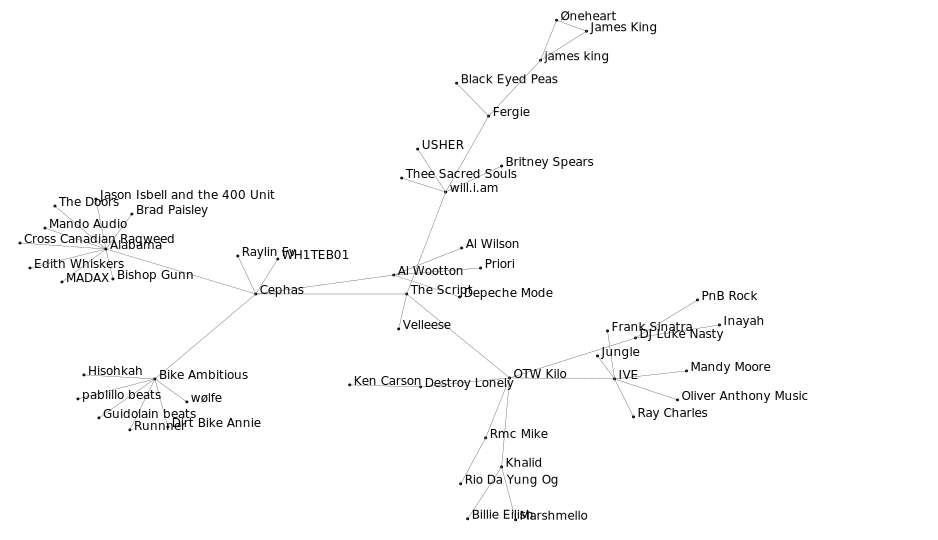

In [47]:
draw_graph(G, node_size=1, show_names=True, edge_width=0.3, font_size=12)

In [18]:
page_rank = nx.pagerank(G)

pr_df = pd.DataFrame().from_dict(page_rank, orient='index')
pr_df.columns = ['page_rank']
pr_df.sort_values('page_rank', ascending=False, inplace=True)
pr_df.head(10)

,page_rank
Alabama,0.084708
Bike Ambitious,0.066471
IVE,0.057339
OTW Kilo,0.052055
Cephas,0.051984
will.i.am,0.044460
Al Wootton,0.038868
The Script,0.033854
Khalid,0.029549
DJ Luke Nasty,0.029549


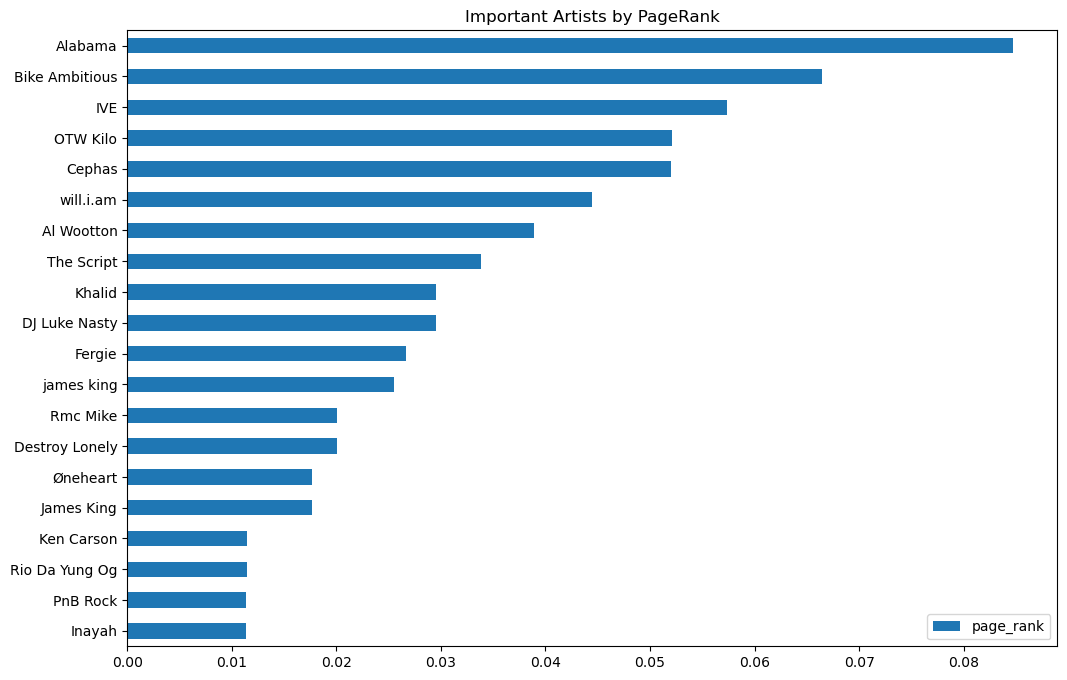

In [19]:
title = 'Important Artists by PageRank'

pr_df.head(20).plot.barh(figsize=(12,8), title=title).invert_yaxis()

In [20]:
top_nodes = pr_df.head(20).index.values

In [21]:
top_nodes[0]

'Alabama'

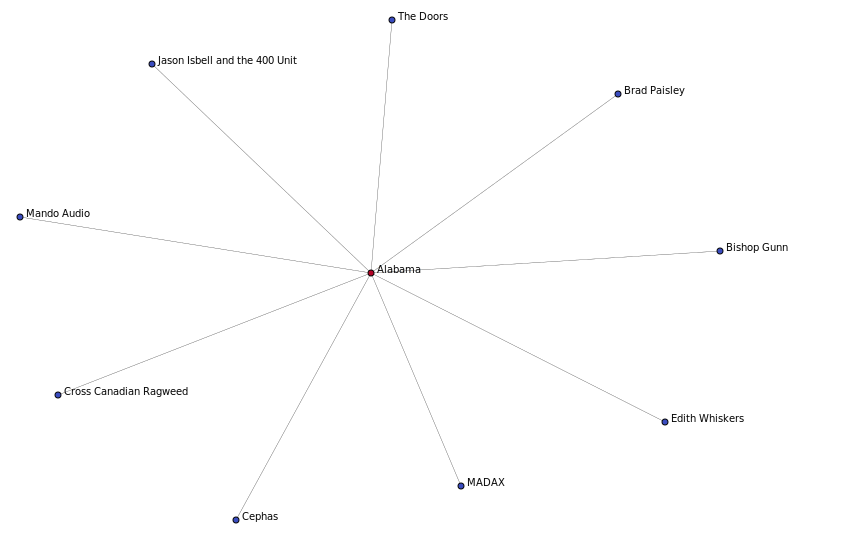

In [22]:
ego = top_nodes[0]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

In [23]:
# you can look at the nodes in the ego network this way, to find interesting topics

nodes = sorted(G_ego.nodes)
nodes

['Alabama',
 'Bishop Gunn',
 'Brad Paisley',
 'Cephas',
 'Cross Canadian Ragweed',
 'Edith Whiskers',
 'Jason Isbell and the 400 Unit',
 'MADAX',
 'Mando Audio',
 'The Doors']

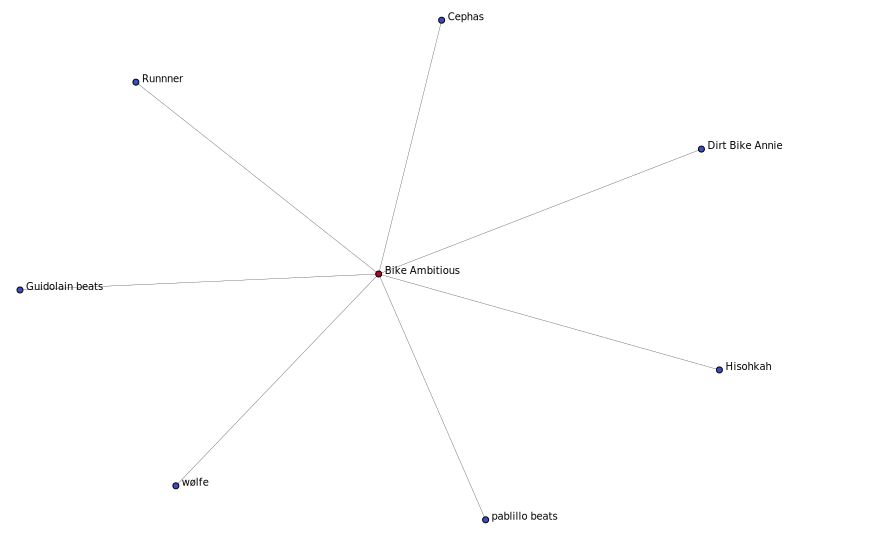

In [24]:
ego = top_nodes[1]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

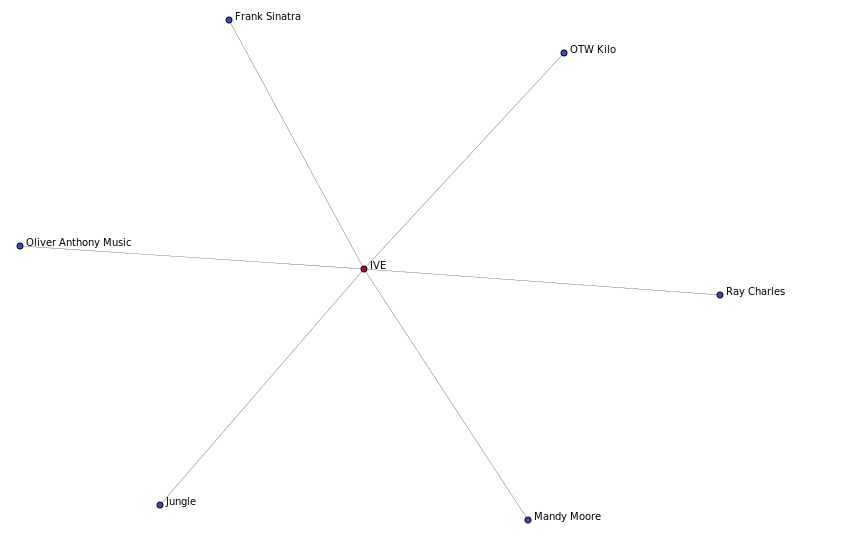

In [25]:
ego = top_nodes[2]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

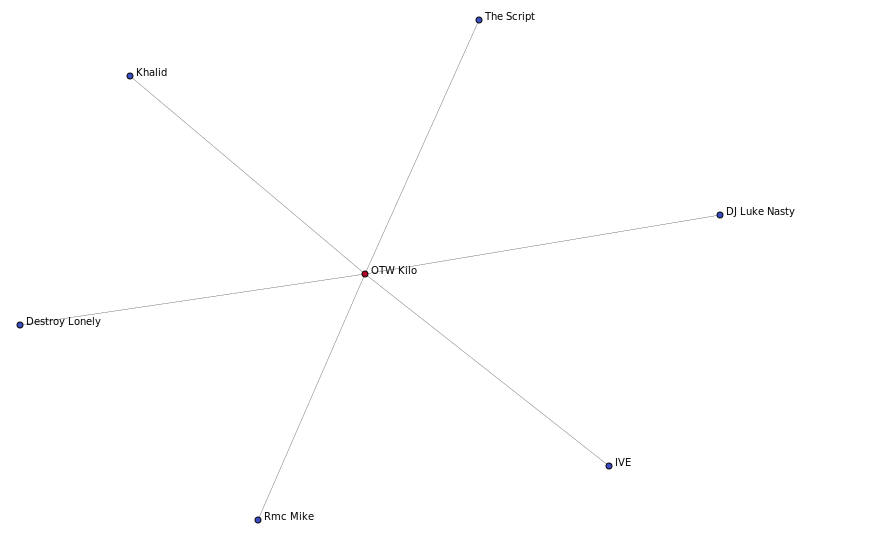

In [26]:
ego = top_nodes[3]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

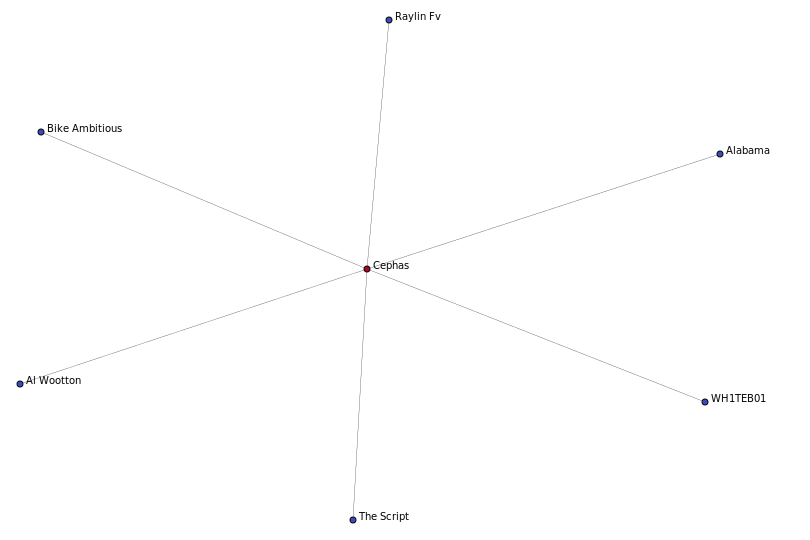

In [27]:
ego = top_nodes[4]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

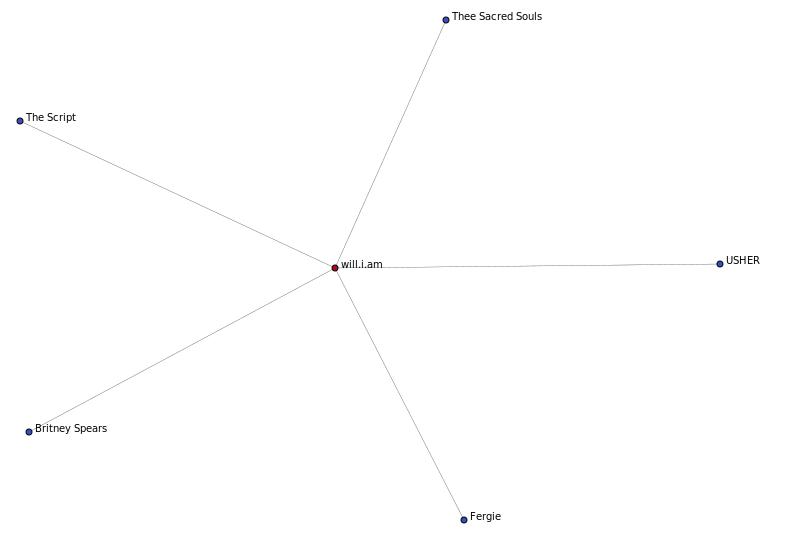

In [28]:
ego = top_nodes[5]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

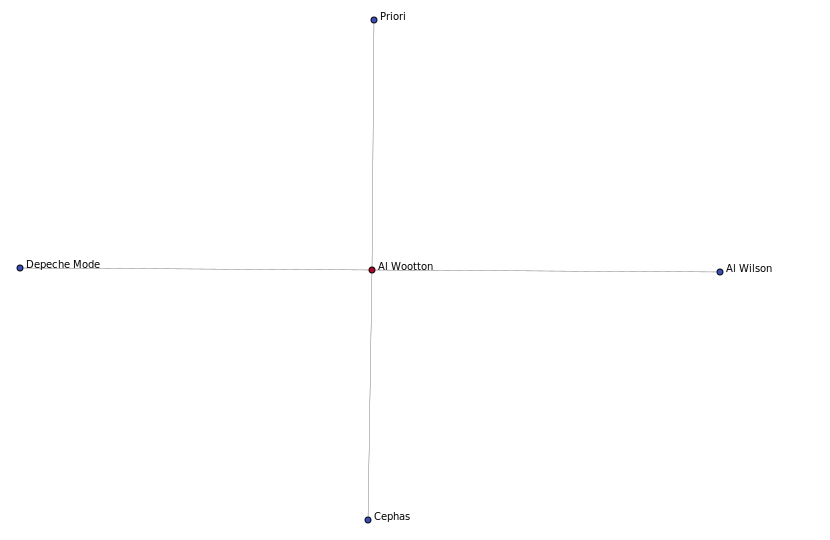

In [29]:
ego = top_nodes[6]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

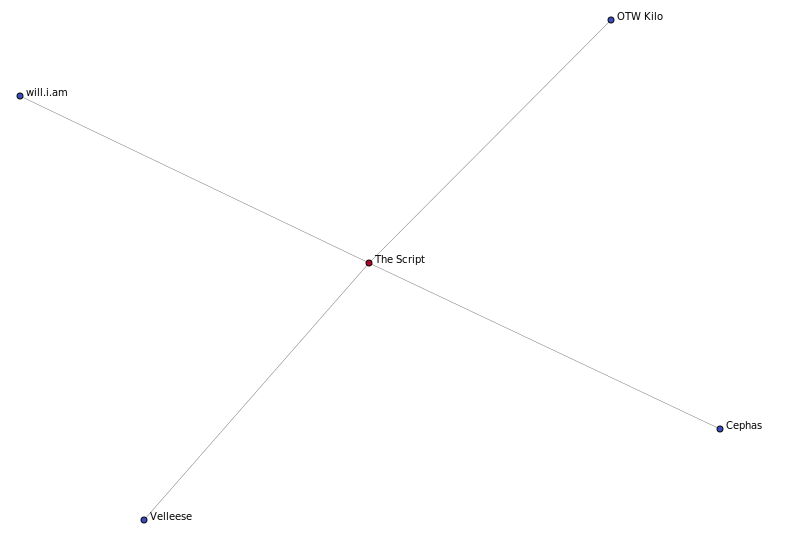

In [30]:
ego = top_nodes[7]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

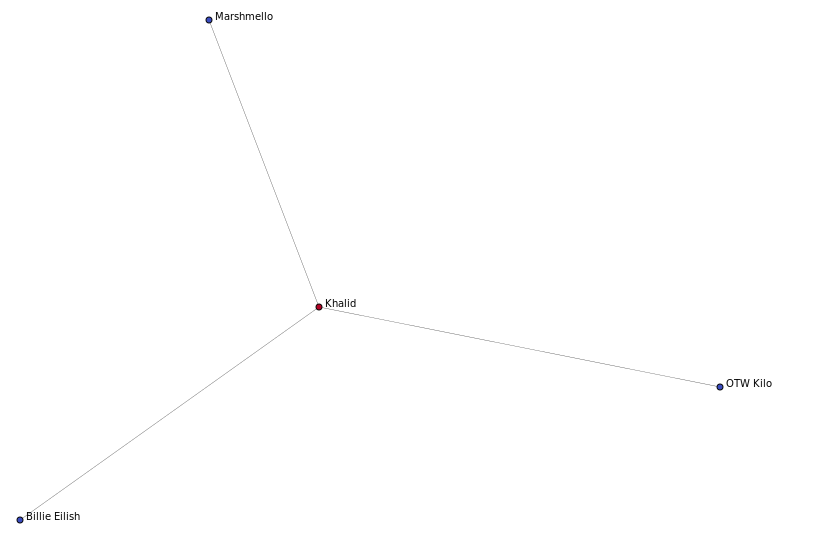

In [31]:
ego = top_nodes[8]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

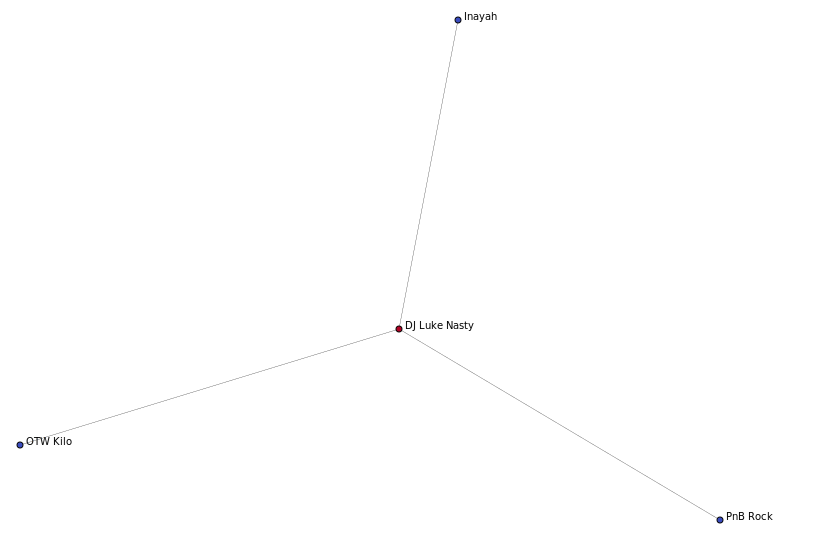

In [32]:
ego = top_nodes[9]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

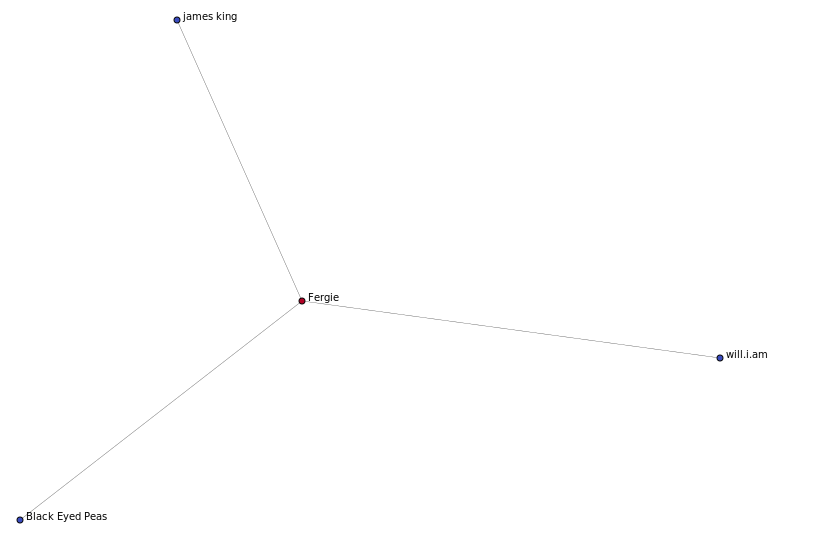

In [33]:
ego = top_nodes[10]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

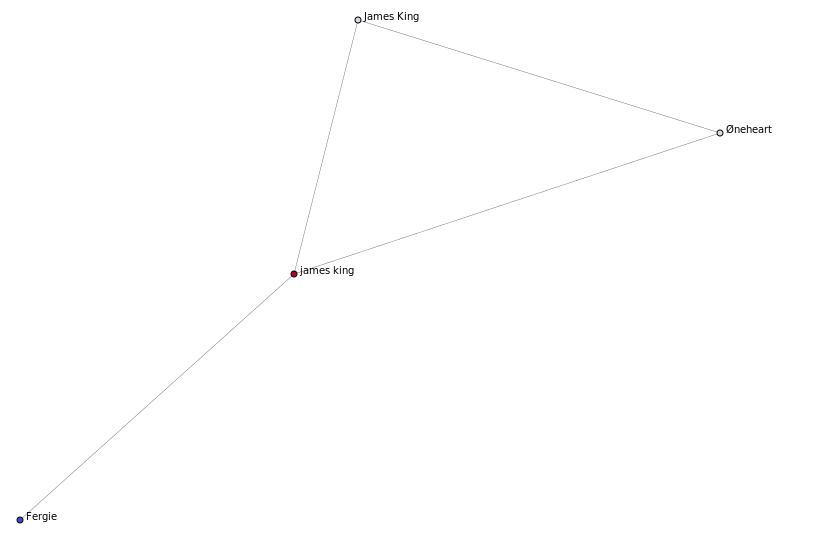

In [34]:
ego = top_nodes[11]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

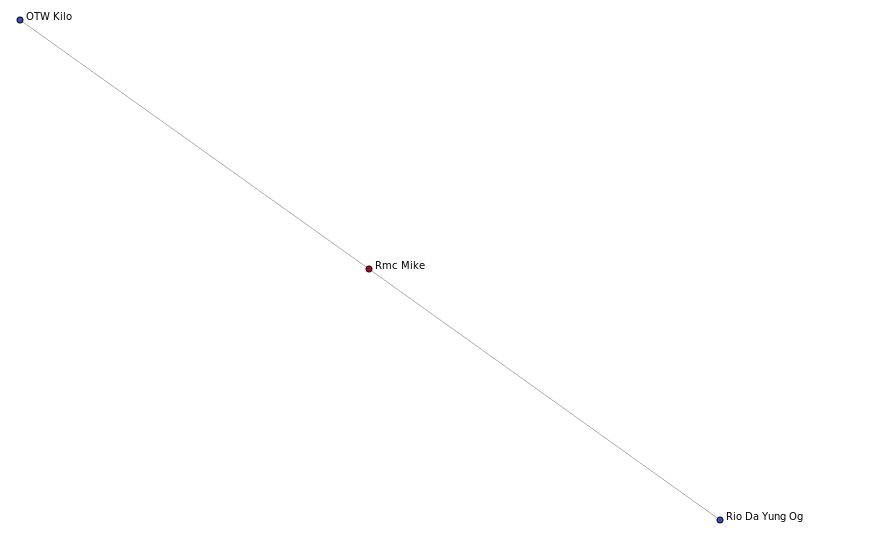

In [35]:
ego = top_nodes[12]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

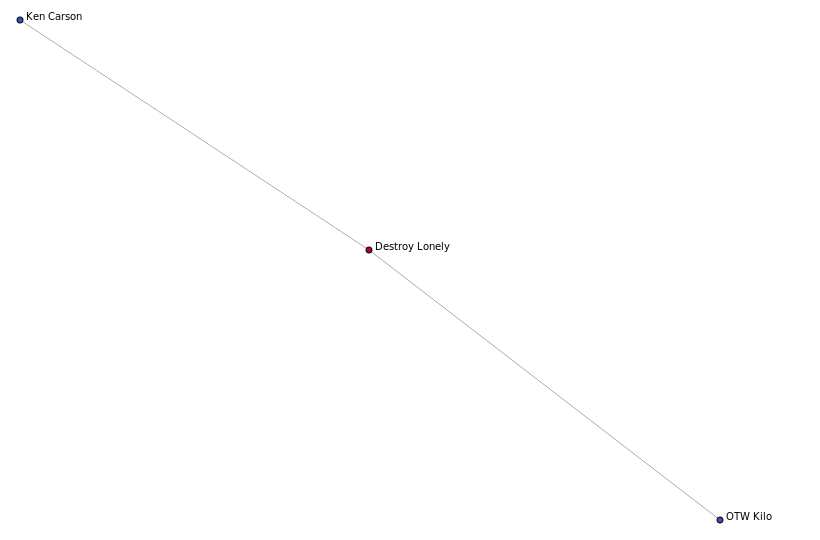

In [36]:
ego = top_nodes[13]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

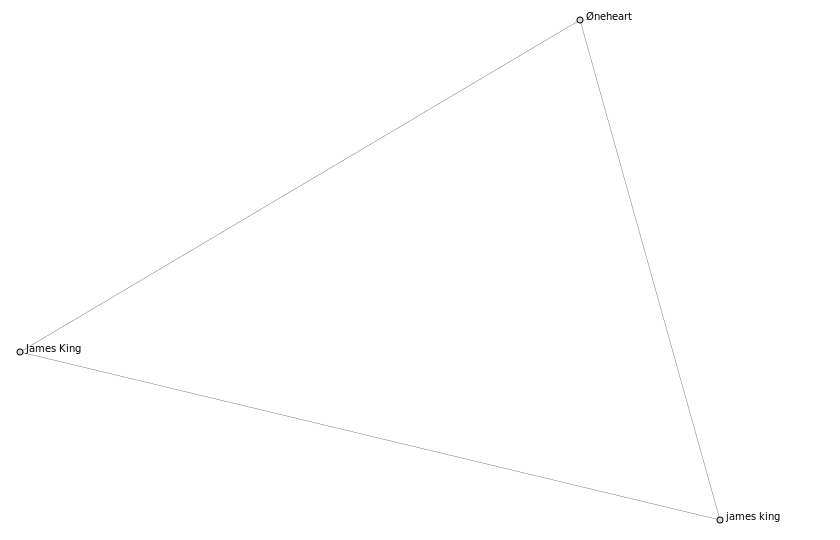

In [37]:
ego = top_nodes[14]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

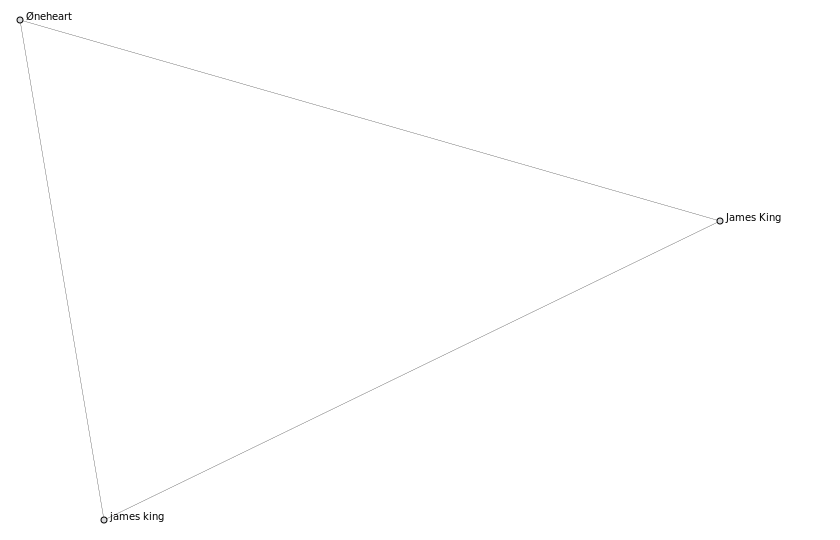

In [38]:
ego = top_nodes[15]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

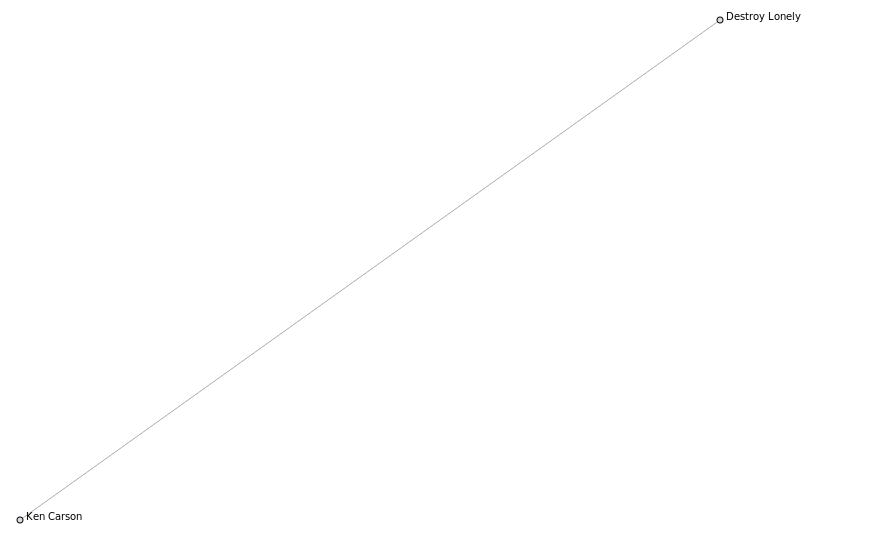

In [39]:
ego = top_nodes[16]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

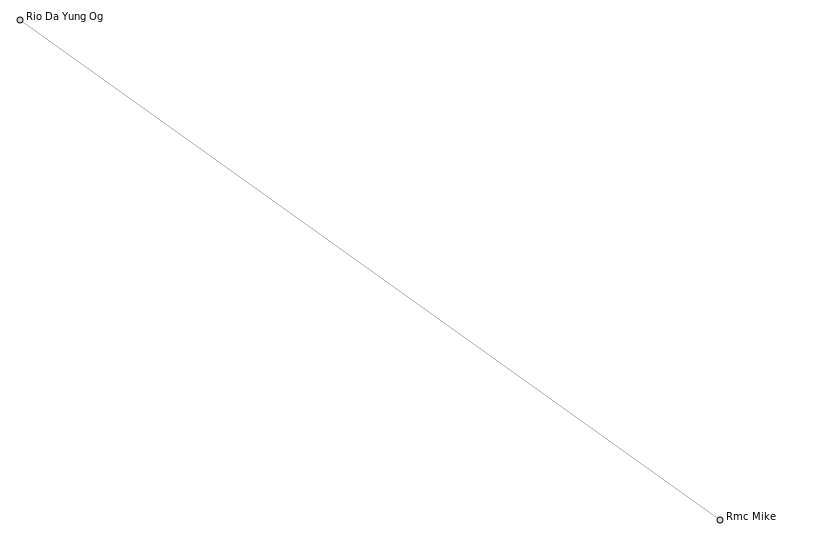

In [40]:
ego = top_nodes[17]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

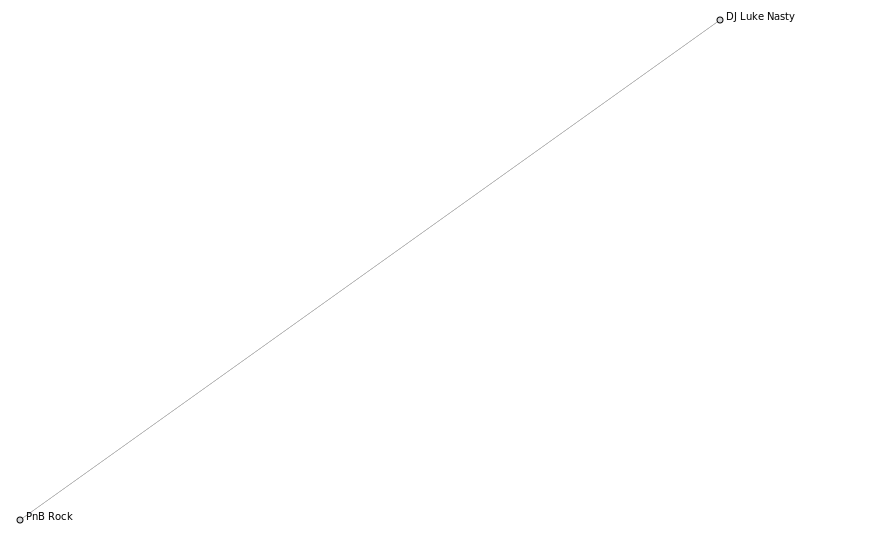

In [41]:
ego = top_nodes[18]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

In [43]:
nx.shortest_path(G, 'Britney Spears', 'Justin Timberlake')

NodeNotFound: Either source Britney Spears or target Justin Timberlake is not in G

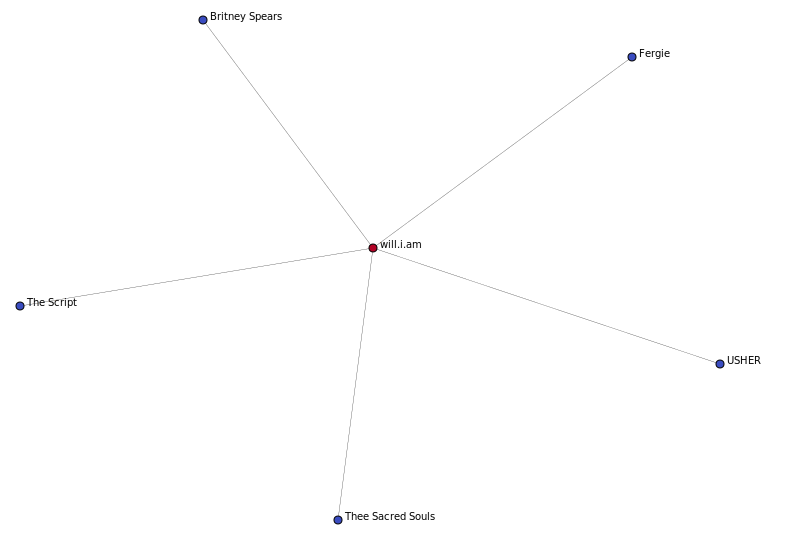

In [44]:
ego = 'Britney Spears'

G_ego = nx.ego_graph(G, ego, 2)

draw_graph(G_ego, show_names=True, node_size=4, edge_width=0.3)